## Metric: synthetic pixel offset

Unlike the other methods, this method requires no additional information and can be applied to any kind of source images. We create an offset field and applies it to a source image, creating the second, synthetic image to be used in the feature tracking algorithm. Then we run FT using this pair and compare the results with the ground truch (i.e. the original offset field).

### Requirements

- There are several steps needed to bo done before running FT. Users have to determine a few parameters for creating the synthetic offset field and create the second image. 

### Procedure

1. Prepare the source image as a Geotiff file. 

2. Determine the parameters for the synthetic offset field and use `gftt.create_synthetic_offset` and `gftt.apply_synthetic_offset` to create pixel-shifted image. See this notebook for details.

3. Perform feature tracking algorithm and collect the resulting velocity field ($V_x$ and $V_y$) as geotiff files.

4. Use `gftt.syn_shift_errors` to calculate the deviation from the ground truth (the synthetic shift field). See this notebook for details.

### Analysis

#### 1. Information and map area

- Test area: Kaskawulsh
- Test package: CARST and Vmap
- Test source image: 20180304 (Landsat 8)

In [1]:
# Developer's setting
%load_ext autoreload
%autoreload 2

In [2]:
import gftt
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# source file
image_geotiff = '../data/LS8/LC08_L1TP_061018_20180304_20180319_01_T1_B8_s.TIF'

In [4]:
src = rasterio.open(image_geotiff)

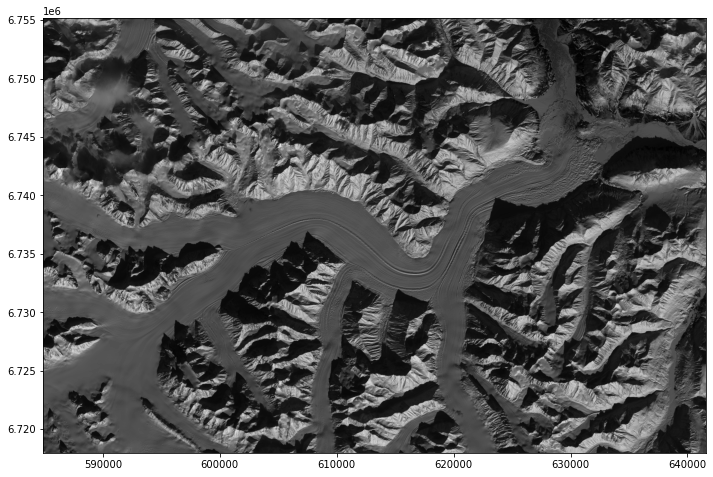

In [5]:
fig, ax0 = plt.subplots(1, 1, figsize=(12, 8))
show(src, cmap='gray', ax=ax0);

#### 2. Create pixel-shifted image

We use the defaul parameters here:

- block size = 500 pixels
- spline order = 1 (linear interpolation)

In [6]:
shift_arx, shift_ary = gftt.create_synthetic_offset(image_geotiff)
shift_arx

array([[0.1, 0.1, 0.1, ..., 0.8, 0.8, 0.8],
       [0.1, 0.1, 0.1, ..., 0.8, 0.8, 0.8],
       [0.1, 0.1, 0.1, ..., 0.8, 0.8, 0.8],
       ...,
       [0.1, 0.1, 0.1, ..., 0.8, 0.8, 0.8],
       [0.1, 0.1, 0.1, ..., 0.8, 0.8, 0.8],
       [0.1, 0.1, 0.1, ..., 0.8, 0.8, 0.8]])

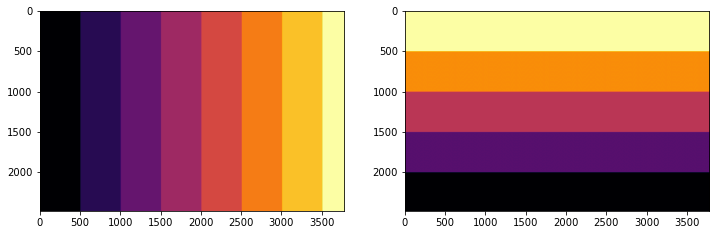

In [7]:
fig, ax1 = plt.subplots(1, 2, figsize=(12, 4))
ax1[0].imshow(shift_arx, cmap='inferno')
ax1[1].imshow(shift_ary, cmap='inferno');

In [8]:
shifted_image = gftt.apply_synthetic_offset(image_geotiff, shift_arx, shift_ary)

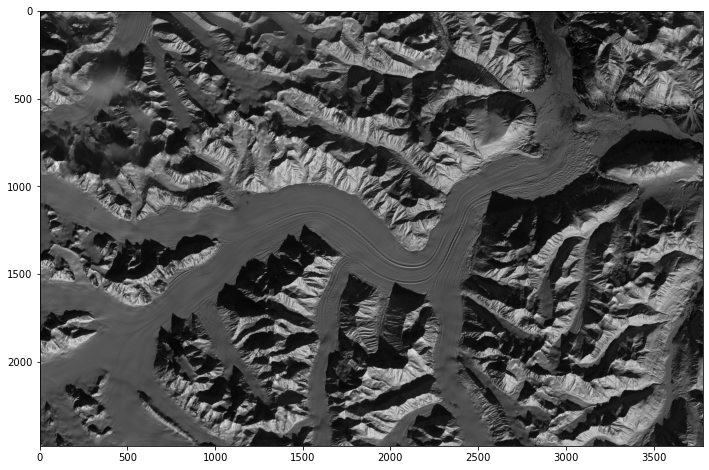

In [9]:
fig, ax2 = plt.subplots(1, 1, figsize=(12, 8))
ax2.imshow(shifted_image, cmap='gray');

Note that this should look really like the source image as the amount of offset is all within 1 pixel. We can save this image as a geotiff and perform feature tracking using whatever package to be tested.


In [10]:
kwds = src.profile
with rasterio.open('shifted_LS8_20180304.tif', 'w', **kwds) as dst:
    dst.write(shifted_image, 1)

#### 3. calculate the feature tracking deviation from the ground truth